# Tips Data Set - Project 2019
### Programing and Scripting
### GMIT Galway
#### Slawomir Sowa 
#### 04/10/2019

## Objectives

* Create a git repository
* discusses and analyses whether there is a relationship between the total bill and tip amount,
* analyse the relationship between the variables within the dataset.

Full description of Assignment can be found <a href="https://github.com/Slawak1/GMIT-FDA_Assesment_2019/blob/master/project.pdf">here</a>

### Tools
To analyse Iris Data Set I work with Python 3.7 and Jupyter Notebook.

<img width='400px' align='left' src='https://www.python.org/static/community_logos/python-logo-master-v3-TM.png'>

<img width='150px' align='left' src='https://jupyter.org/assets/main-logo.svg'>



#### Used Libraries and tools
#### Pandas
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. http://pandas.pydata.org

#### NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object, sophisticated (broadcasting) functions, useful linear algebra, Fourier transform, and random number capabilities, Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases. https://www.numpy.org/

#### Matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery. https://matplotlib.org/index.html

#### Seaborn
Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. https://seaborn.pydata.org/

#### Jupyter Notebook
The Jupyter Notebook is an open-source web application that allows to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. https://jupyter.org/index.html

 ## 1. Setting the research goal

The main goal of the project is to analyze the relationship between the bill and the tip and check if such a relationship exists. The secondary goal is to analyze the other variables in the data set. such as customer sex, day of the week, or time of day. 

## 2. Retrieve data

In this step we collect data, ensure that we can use the data in our program, which means checking the existence of, quality, and access to data.

Our data are stored in csv file and we can fined dataset here: [tips dataset](https://github.com/Slawak1/GMIT-FDA_Assesment_2019/blob/master/tips.csv)

To work with data we need to import all necessery tools as pandas and numpy for data manipulation, matplotlib and seaborn for data visualisation. 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

To read data from Tips.csv file I used pandas library and read_csv function. Variable df is my data frame. 

In [2]:
df = pd.read_csv('tips.csv') 
print(df.shape)

(244, 7)


Pandas <code>shape() </code> function returns tuple representing the dimensionality of the DataFrame. Our dataset contains 244 rows and 7 columns.

To display names of the columns we can use <code>columns</code> atribute.

In [3]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

We can change column name by passing new name to dictionary 

In [4]:
df = df.rename(columns = {"day":"week day", "size":"table size"})

<code>df.head() </code>function returns first 5 rows from data freame. It is useful for quickly testing if your object has the right type of data in it.

In [5]:
df.head(5)

,total_bill,tip,sex,smoker,week day,time,table size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<code>df.tail()</code> returns last 5 rows from data frame. We can use it for veryfying data.

In [6]:
df.tail(5)

,total_bill,tip,sex,smoker,week day,time,table size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## 3. Data Preparation

This phase consist of three subphases:<br> <i> data cleansing </i> removes false values from a data source and inconsistencies acreoo data source, <br> <i> data integration</i> enrich data source by combining information from multiple data source and <br><i> data transformation</i> ensures that the data is in a suitable format for use.

To check is any data missing in Tips data set I used <code>isnull()</code> function from pandas library. Function returns boolean value <code>True</code> if null value exists and <code>False</code> if not null value founded. Pandas will recognise empty cell or <code>NA</code> as missing values.


In [7]:
df.isnull().any()


total_bill    False
tip           False
sex           False
smoker        False
week day      False
time          False
table size    False
dtype: bool

The above code shows us that there is no <code>null</code> values in our data frame.

But sometimes it might be the case where there’s missing values that have different formats than empty cell or N/A.
For example it can be '--', 'na' or 'n/a'. <br>
To find that kind of missing values we can use python code and iterate over a list of missing values.  

In [8]:
# create a list of missing values
missing = ['--','-','na','n/a'] 

# test if values exist in our data frame
for i in missing:
    if i in df.values:
        print ('Missing values exist')
    else:
        print ('No missing values detected')

No missing values detected
No missing values detected
No missing values detected
No missing values detected


## 4. Data Exploration

In this chapter we will try to understand how variables interact with each other, the distribution of the
data, and whether there are outliers.

<code>describe()</code> function generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [9]:
df.describe()

,total_bill,tip,table size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Scatter plot shows relation between <code>total bill</code> and <code>tip</code>.

Text(0, 0.5, 'Tip in $')

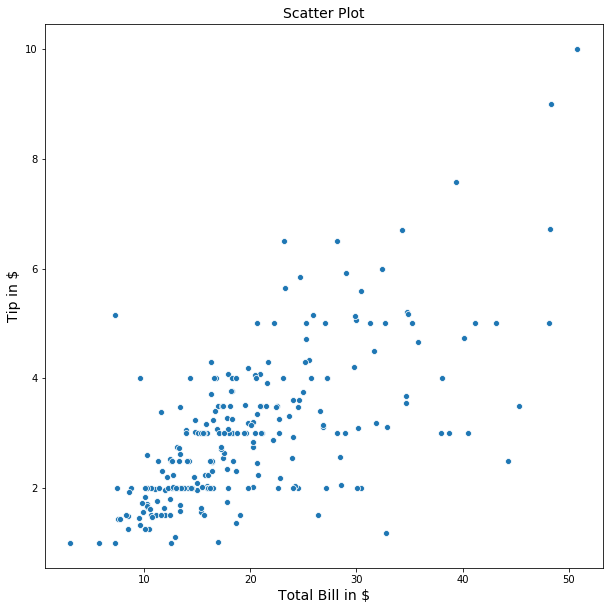

In [10]:
# Scatter Plot
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="total_bill", y="tip", data=df )
ax.set_title('Scatter Plot', fontsize='14')
plt.xlabel('Total Bill in $', fontsize='14')
plt.ylabel('Tip in $', fontsize='14')

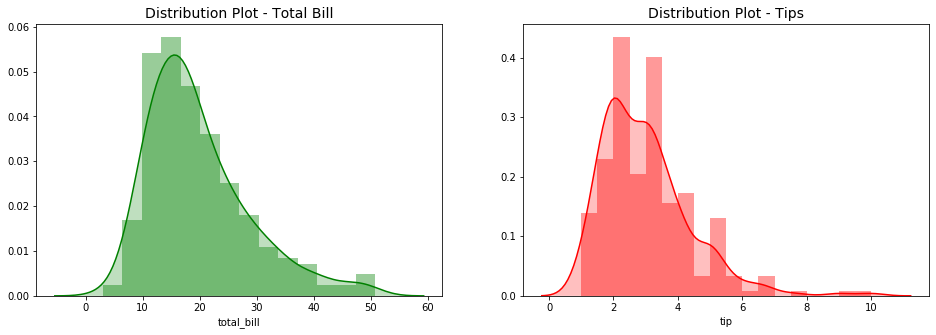

#### Normality Test - Q-Q Plot

>The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

https://data.library.virginia.edu/understanding-q-q-plots/

[Text(0, 0.5, 'Tip in $'), Text(0.5, 1.0, 'Q-Q Test - Tip')]

<Figure size 432x288 with 0 Axes>

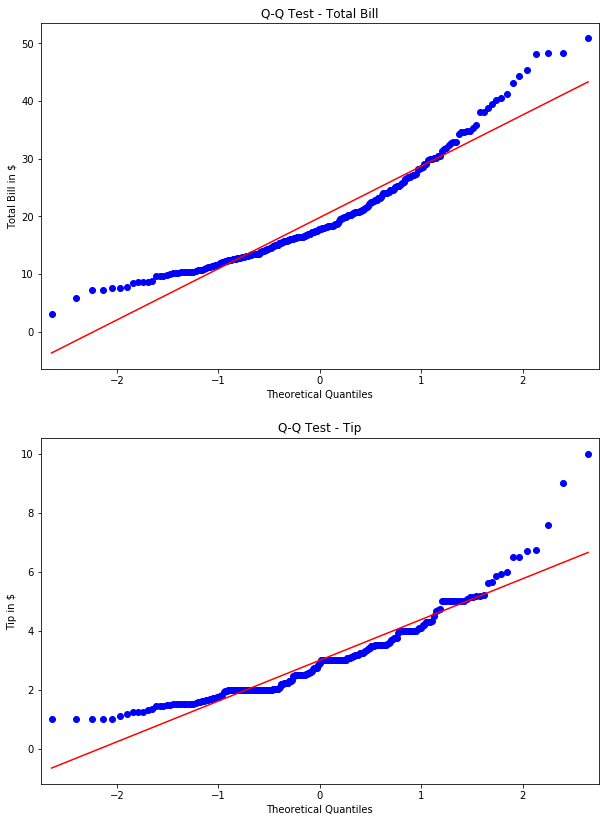

In [50]:
# Q-Q Plot
plt.figure()

fig, ax = plt.subplots(2,1, figsize=(10, 14))

# plot qq charts with data
qqplot(df['total_bill'],ax = ax[0], line='s', )
qqplot(df['tip'],ax = ax[1], line='s', )


# set title and axis labels
ax[0].set(title='Q-Q Test - Total Bill', ylabel = 'Total Bill in $' )
ax[1].set(title='Q-Q Test - Tip', ylabel = 'Tip in $')


We can see that our Q-Q plot is not a straight line. Plot of that shape indicates that our data are Skewly Distributed. <br>
Histogram Plot confirms that.

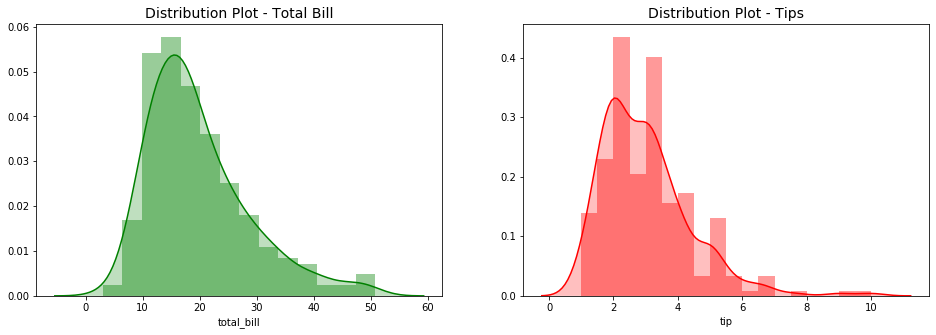

In [58]:
fig, axes = plt.subplots(1,2, figsize = (16,5))

axes[0].set_title('Distribution Plot - Total Bill', fontsize='14')
axes[1].set_title('Distribution Plot - Tips', fontsize='14')


sns.distplot(df['total_bill'], hist=True, color="g",  kde_kws={"shade": True}, ax = axes[0])
sns.distplot(df['tip'], hist=True, color="r", kde_kws={"shade": True}, ax = axes[1])

#### Shapiro-Wilk Test

Visually we confirm that <code>total_bil</code> and <code>tip</code> are not Normally Distributed. <br> However, let's try to confirm that using Shapiro-Wilk Test.

>The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [55]:
# import shapiro() function from scipy.stats
from scipy.stats import shapiro

stat, p = shapiro(df['total_bill'])
print('Statistics=%.3f, p=%.15f' % (stat, p))


alpha = 0.05 
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.920, p=0.000000000332454
Sample does not look Gaussian (reject H0)


In [60]:
stat, p = normaltest(df['tip'])
print('Statistics=%.3f, p=%.30f' % (stat, p))


alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=79.379, p=0.000000000000000005796294322907
Sample does not look Gaussian (reject H0)


Both tests failed, which means that or data are not Normally Distributed.

#### Finding outliers

An outlier may indicate bad data. For example, the data may have been coded incorrectly. Outlying observations can cause problems because they may strongly influence the result. 

To find outliers we can use few different methods, such as IQR-Score, Z-Score or Scatter Plot. From our scatter plot we can see that we have few points that stands out from the rest. 

When the data are normally distributed, about 68% of the measurements will be within one standard deviation of the mean. About 95% of the measurements will be within two standard deviations and 99% within three standard deviations of the mean.   

To calculate Z-Score we use formula:

$$ Z = \frac {X- \overline{\rm X}}{S} $$<br>
Where: $Z$ - Z-Score, $X$ - individual measurement, $\overline{\rm X}$ - the mean of the measurement, $S$ - The standard deviation

In [45]:

from scipy import stats 

# create new dataframe
tips_bill_df = df[['total_bill','tip']].copy()

# calculate z-score
z_score = np.abs(stats.zscore(tips_bill_df))


threshold = 3
print(np.where(z_score > threshold))

(array([ 23,  59, 156, 170, 170, 212, 212], dtype=int64), array([1, 0, 0, 0, 1, 0, 1], dtype=int64))


As result we got two arrays - rows and columns in our dataframe. Let's check row 23<br> For row 23 in our dataframe we got \\$39.42 bill and \$7.58 tip. Z-Score value 3.318 indicates that is an outlier. 

In [46]:
print (z_score[23][1])

3.3181644442898395


In [47]:
print (tips_bill_df.loc[[23]])

    total_bill   tip
23       39.42  7.58


In general I could exclude outliers from my data set. However, because our data are positively skewed, which means that mean and  

Let's check the percentage value of tips in relation to the total bill

In [ ]:
# Calculate percentage value
percent = (df['tip']/df['total_bill'])*100
df['percent'] = percent
df.describe()

We can see that the tips are around $16\%$ of the bill

In [ ]:
df.groupby('week day').count()

Saturday and Sunday are the busiest day of the week, where Friday is very quiet day

In [ ]:
# percentage value of tips in relation to the total bill
sum_df = df.groupby('week day').sum() # create new dataframe sum_df
sum_df.drop('table size',inplace = True, axis=1) # drop column 'table size'
sum_df['percent'] = sum_df['tip']/sum_df['total_bill']*100 # add new column 'percent'
sum_df 

In [ ]:
# plt.figure(figsize=(4,4))
           
sns.set(style="whitegrid")
fig = sns.catplot(x = 'total_bill', y='tip',  data=sum_df, height=8, kind="bar", palette="muted")
fig.set_ylabels("Sum of Tips")
fig.set_xlabels("Sum of Total Bill")


ticks = sum_df['total_bill']
ticks = ticks.sort_values()
 
xlabels = ['Friday', 'Thursday','Saturday','Sunday']

fig.set_xticklabels(xlabels)

Who eats more? smoker on non smokers?

In [ ]:
df.groupby('smoker').count()

In [ ]:
smoker_df = df.groupby('smoker').sum()
smoker_df.drop('table size', inplace = True, axis = 1)
smoker_df.drop('percent', inplace = True, axis = 1)
smoker_df['percent'] = (smoker_df['tip']/smoker_df['total_bill']*100)
smoker_df

In [ ]:
sns.set(style="whitegrid")
fig = sns.catplot(x = 'total_bill', y='tip',  data=smoker_df, height=6, kind="bar", palette="muted")
fig.set_ylabels("Sum of Tips")
fig.set_xlabels("Sum of Total Bill")

ticks = smoker_df['total_bill']
ticks = ticks.sort_values()
xlabels = ['$' + '{:,.2f}'.format(i) for i in ticks]

fig.set_xticklabels(xlabels)


Who eats more and tips more? Male or Female?

In [ ]:
df.groupby('sex').count()

In [ ]:
gender_df = df.groupby('sex').sum()
gender_df.drop('table size', inplace = True, axis = 1)
gender_df.drop('percent', inplace = True, axis = 1)
gender_df['percent'] = (gender_df['tip']/gender_df['total_bill']*100)
gender_df

In [ ]:
sns.set(style="whitegrid")
fig = sns.catplot(x = 'total_bill', y='tip', data=gender_df,  height=6, kind="bar", palette="muted")
fig.set_ylabels("Sum of Tips")

#ticks = gender_df['total_bill']
# ticks = ticks.sort_values()
# xlabels = ['$' + '{:,.2f}'.format(i) for i in ticks]
plt.legend(['test_label1', 'test_label2'])
xlabels = 'male','female'
fig.set_xticklabels(xlabels)

### 4.1 Linear Regression 

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

$$ y =  b_1{x} + b_0$$<br>

where: $b_0$ - calles also as y-intercept, indicates the location where it cross an y axis, $b_1$ - The slope indicates the steepness of a line, $y$ - dependent variable,<br> $x$ - independent variable

https://realpython.com/linear-regression-in-python/

In [ ]:
# reshape 'total_bill' column to 2D array
z = df['total_bill']

x = z.values.reshape(-1,1)
x.shape


In [ ]:
y = df['tip']
y.shape

In [ ]:
model = LinearRegression()
results = model.fit(x, y)

In [ ]:
print('b0, y-intercept:', model.intercept_) # The y-intercept indicates the location where it cross an y axis
print('b1, slope:', model.coef_) # The slope indicates the steepness of a line

The value 𝑏₀ = 0.92 (approximately) illustrates that our model predicts the response 0.92 when 𝑥 is zero. The value 𝑏₁ = 0.10 means that the predicted response rises by 0.10 when 𝑥 is increased by one.

Our estimated regression equation:
$$ y =0.10x + 0.92$$<br>

In [ ]:
# scatter plot and estimated regression line
plt.figure(figsize=(10, 10))
ax = plt.plot(x, 0.10 * x + 0.92, 'r-', label=r"$0.10x + 0.92$")
ax = sns.scatterplot(x="total_bill", y="tip", data=df )
ax.legend(fontsize='14')
ax.set_title('Scatter Plot', fontsize='14')
plt.xlabel('Total Bill in $', fontsize='14')
plt.ylabel('Tip in $', fontsize='14')

To check how good our model fits data we can use $R^2$ value. $R^2$ is a "goodness-of-fit" measure for linear regression models.  Higher $R^2$ values represent smaller differences between the observed data and the fitted values and is the percentage of the dependent variable variation that a linear model explains.

$$R^2 = \frac {Variance \: explained \: by\: the\: model}{Total\: Variance}$$

In [ ]:
R_sqr = model.score(x, y)
print (f'R square is equal: {R_sqr}')

The larger the R2, the better the regression model fits our observations. In our case we got  $ R^2 = 45.7\%$. This value is low because human nature and human behavior are difficult to predict. Any study that attempts to predict human behavior will tend to have $R^2$ values less than 50%

#### Cost

In [ ]:
b1 = 0.10
b2 = 0.92

cost = 0
for i in range (x.size):
    value = (y[i] - b1 * x[i] - b2)**2
    cost += value

print (cost)

#### Prediction

In [ ]:
# prediction = model.predict(x)
# print('Predicted:', prediction, sep='\n')

In [ ]:
#df['Predicted'] = prediction

In [ ]:
df.head()

In [ ]:
tip = b1*x[0]+b2
tip

## References

Pandas Data Frame

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


"Introducing Data Science" Davy Cielen, Arno D. B. Meysman, Mohamed Ali - Manning 2016


missing values:<br>
https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

Regression Plots:<br>
https://seaborn.pydata.org/tutorial/regression.html

$R^2$  - https://statisticsbyjim.com/regression/interpret-r-squared-regression/<br>

Normality Test - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Outliers - https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba